# Fastcampus Data EDA

여러분이 생각해봐야 할 기본적인 상황입니다.

패스트캠퍼스의 비즈니스 모델은 어떻게 될까요?

사람들은 패스트캠퍼스의 강의를 어떻게 알게 될까요?

패스트캠퍼스에서 강의를 결제하는 과정은 어떻게 될까요?

유저들이 강의를 구매하는 과정을 어떻게 기록할까요?

결제가 된 내역은 어떻게 관리할까요?

제안하는 주제들은 다음과 같습니다.
1. EDA : 강의 구매내역을 가지고 마케팅팀과 콘텐츠 기획팀이 어떤 방향으로 강의를 제작할 수 있을지 아이디어를 제공해주세요.
2. 고객군 분석 : 패스트캠퍼스에서 강의를 구매하는 사람들은 어떤 그룹으로 분류될지 고민해 보세요. 그룹으로 나뉘게 된다면, 해당 그룹은 어떤 특징을 가지고 있나요?
3. 구매 내역 분석 : 사람들은 어떤 강의를 많이 구매할까요? 사람들의 구매 패턴을 파악해보고, 마케팅이 효과가 있었는지 특정 그룹에게 해당 상품이 효과가 있는지 등을 파악해보세
요.

소소한 프로젝트 진행 Tip.

kaggle에서 거래 내역을 기반으로 분석한 EDA notebook들을 살펴보세요.

최대한 많은 그래프를 그려보세요.

최대한 다양한 통계량을 계산해보세요.

내가 진짜 회사에서 Data Scientist라면? 내가 Performance Marketer라면? 실제 액션 플랜을 상상해보세요.

프로젝트의 목적에 대해서 생각해보세요. 데이터 분석 라이브러리 연습을 많이 하고 싶은지, 분석 인사이트를 키우고 싶은지.

## 문제정의

1. 많이 팔린 강의와 안 팔린 강의  [분석, 비교] 하기 - 구매율과 취소율 비교 

## 데이터 수집

### 데이터 설명

| 변수 | 설명 |
| ---- | ---- |
| id | 해당 거래내역에 대한 ID(PK) |
| customer_id | 결제한 고객 ID |
| course_id | 강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다. |
| type | 거래의 종류 |
| state | 거래에 대한 상태 |
| course_title | 강의 제목 |
| category_title | 대분류 |
| format | 온라인 강의의 기획 종류 |
| completed_at	 | state가 COMPLETED로 변경된 시점 |
| transaction_amount | 최종 결제 금액 |
| coupon_title | 쿠폰 종류 |
| coupon_discount_amount | 쿠폰 할인 금액 |
| sale_price | 판매 금액 |
| tax_free_amount | 세금 공제 금액(보안상 공유가 힘듦: 컬럼 제거) |
| pg | PG사 종류 |
| method | 결제 방식 |
| subcategory_title | 중분류 |
| marketing_start_at | 강의 판매 시점 (자세한 사항은 공유가 힘듦) |

### 데이터 불러오기

In [1]:
# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 구글 드라이브 파일 엑세스
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 코랩
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 런타임 재시작

In [4]:
# matplotlib의 폰트를 Nanum 폰트
plt.rc('font', family='NanumBarunGothic') 

In [5]:
# 한글
# plt.rc("font", family = "Malgun Gothic")
# sns.set(font="Malgun Gothic", 
# rc={"axes.unicode_minus":False}, style='darkgrid')

In [6]:
# 데이터 로딩 및 확인
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/데이터분석프로젝트_VER2_210329_210926.csv", encoding='cp949')
# data.head()

In [7]:
# 데이터 로딩 및 확인
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/파이널프로젝트_RAW_210329_210926.xlsx")
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


### 데이터 타입과 결측치 확인하기

In [8]:
# shape
data.shape

(105419, 18)

In [9]:
# data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [10]:
# 결측치
data.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

## 데이터 탐색

### 불필요한 값 제거

| type | 유형 |
| ---- | ---- | 
| ORDER | DEPRECATED |
| PAYMENT | 결제 |
| TRANSACTION | B2B계약결제(무시해도 좋음) |
| REFUND | 환불 |

| state | 상태 | 
| ---- | ---- |
| COMPLETED | 결제 완료 |
| REQUESTED | 고객에게 결제 요청 |
| PENDING | 보안 이슈로 공개 X |
| CANCELLED | 보안 이슈로 공개 X |
| HIDDEN | 보안 이슈로 공개 X |
| DELETED | 보안 이슈로 공개 X | 

In [11]:
# 'tax_free_amount' column 삭제
data = data.drop('tax_free_amount', axis = 1)

# 'format'에서 결측치 제거
data['format'] = data['format'].fillna('프로모션')
data = data.drop(data[data['format']=='프로모션'].index)

# 'type'에서 결측치 처리 및 type_drop_list인 row 제거
type_drop_list = ['ORDER', 'TRANSACTION']
for name in type_drop_list:
    data = data.drop(data[data['type']==name].index)

# 'state'에서 state_drop_list인 row 제거
state_drop_list = ['PENDING', 'CANCELLED', 'DELETED', 'REQUESTED']
for name in state_drop_list:
    data = data.drop(data[data['state']==name].index)

# 'pg'의 NaN 값들을 'PG'로 대체
data['pg'] = data['pg'].fillna('PG')

# index reset
data = data.reset_index()

# 이전 index column drop
data = data.drop('index', axis = 1)

In [12]:
data

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,PG,CARD,NaN,2021-03-04
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PG,CARD,PPT/보고서,2019-11-14
2,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,PG,CARD,영상 편집,2020-12-02
3,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,PG,CARD,NaN,2020-11-27
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,PG,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56718,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
56719,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02
56720,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
56721,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [13]:
# tax_free_amount 컬럼 제거 
# data = data.drop('tax_free_amount',axis=1)

In [14]:
# Data Frame columns 조회
# data.columns

In [15]:
# type이 ORDER인 행 제거
# cond = data[data['type']=='ORDER'].index
# data = data.drop(cond)

In [16]:
# type이 TRANSACTION인 행 제거
# cond = data[data['type']=='TRANSACTION'].index
# data = data.drop(cond)

In [17]:
# type value 종류 확인
# data['type'].unique()

In [18]:
# state가 PENDING인 행 제거
# cond = data[data['state']=='PENDING'].index
# data = data.drop(cond)

In [19]:
# state가 CANCELLED인 행 제거
# cond = data[data['state']=='CANCELLED'].index
# data = data.drop(cond)

In [20]:
# state가 HIDDEN인 행 제거
# cond = data[data['state']=='HIDDEN'].index
# data = data.drop(cond)

In [21]:
# state가 DELETED인 행 제거
# cond = data[data['state']=='DELETED'].index
# data = data.drop(cond)

In [22]:
# state value 종류 확인
# data['state'].unique()

### transaction_amount가 0인 값 drop

In [23]:
# transaction_amount이 0인 값들의 method를 출력 -> PROMOTION만 나옴
data[data['transaction_amount'] == 0]['method'].unique()

array(['PROMOTION'], dtype=object)

In [24]:
# method가 PROMOTION인 값들의 transaction_amount를 출력 -> 0만 나옴
data[data['method'] == 'PROMOTION']['transaction_amount'].unique()

array([0])

In [25]:
# method가 promotion이면서 transaction_amount가 0원인 것들
data[(data['method'] == 'PROMOTION') & (data['transaction_amount'] == 0)]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
133,971612,14030.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-03-28 22:26:58,0,한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2...,110500.0,110500.0,PG,PROMOTION,백엔드 개발,2021-02-01
192,972001,458172.0,201478.0,PAYMENT,COMPLETED,올인원 패키지 : TypeScript & Angular 실전,프로그래밍,올인원,2021-03-29 00:14:32,0,수강생 50만명 돌파 기념 감사제 쿠폰,111000.0,101000.0,PG,PROMOTION,프론트엔드 개발,NaT
200,972056,464239.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 00:55:02,0,수강생 50만명 돌파 기념 감사제 쿠폰,117500.0,110500.0,PG,PROMOTION,개발자 커리어,NaT
209,972116,440315.0,201518.0,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-03-29 01:51:17,0,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,9900.0,PG,PROMOTION,개발자 커리어,NaT
211,972122,440315.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 01:56:59,0,수강생 50만명 돌파 기념 감사제 쿠폰,115500.0,110500.0,PG,PROMOTION,개발자 커리어,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56549,1363763,23638.0,206742.0,PAYMENT,COMPLETED,올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,데이터사이언스,올인원,2021-09-24 15:10:10,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,409000.0,409000.0,PG,PROMOTION,데이터엔지니어링,2021-09-13
56565,1363886,377623.0,206257.0,PAYMENT,COMPLETED,초격차 패키지 : 게임 개발자 취업의 모든 것,프로그래밍,올인원,2021-09-24 15:58:22,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,269000.0,269000.0,PG,PROMOTION,게임,2021-08-09
56615,1364276,455280.0,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-09-24 17:58:18,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,159000.0,159000.0,PG,PROMOTION,업무자동화,2020-11-25
56626,1364341,475055.0,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-24 18:56:08,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,329000.0,329000.0,PG,PROMOTION,주식 투자,2021-07-13


In [26]:
cond = data[data['transaction_amount']==0].index
data = data.drop(cond)

### pg, method columns -> payment_data column 병합

In [27]:
# pg 컬럼 nan 값 PG값으로 대체
data['pg'] = data['pg'].fillna('PG')

In [28]:
# pg 컬럼 값 확인
data['pg'].unique()

array(['PG', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [29]:
# method nan 값 공백으로 대체
data['method'] = data['method'].fillna('')

In [30]:
# method 컬럼 값 확인
data['method'].unique()

array(['CARD', 'VBANK', 'TRANS', 'TRANSFER', 'ONSITE', 'POINT', 'VOUCHER'],
      dtype=object)

In [31]:
# payment_data 컬럼 생성
data['payment_data'] = data['pg'] +' '+ data['method']

In [32]:
# pg, method 컬럼 삭제
data = data.drop(['pg', 'method'], axis=1)

In [33]:
# payment_data 컬럼 값 확인
data['payment_data'].unique()

array(['PG CARD', 'PG VBANK', 'PG TRANS', 'PG TRANSFER', 'PG ONSITE',
       'INICIS CARD', 'INICIS VBANK', 'INICIS TRANS', 'KAKAO CARD',
       'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD', 'PAYCO POINT',
       'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS', 'PG VOUCHER',
       'NAVER POINT'], dtype=object)

In [34]:
# payment_data nan값 검색
data['payment_data'].isna().sum()

0

### 구매관련 정보들 분석

최대 금액 구매 고객

In [35]:
data.loc[data['transaction_amount'] == data['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
10594,1039468,512983.0,204638.0,PAYMENT,COMPLETED,(B2B) 서울형 청년인턴 디지털 마케팅 및 영업 과정 (국내),마케팅,B2B,2021-04-29 15:51:40,113400000,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


단일품목 가장 상품 구매 고객

In [36]:
data.loc[data['sale_price'] == data['sale_price'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
39468,1252478,116416.0,203992.0,PAYMENT,COMPLETED,(B2B) 하나금융티아이 DT University(2021),크리에이티브,B2B,2021-07-30 15:10:39,44600000,NaN,NaN,44600000.0,NaN,NaT,INICIS CARD


단편적으로 최대 구매 고객과 단일 최고 금액 고객은 모두 format이 B2B인 것을 확인 가능하다.

'subcategory_title' 별 구매 횟수

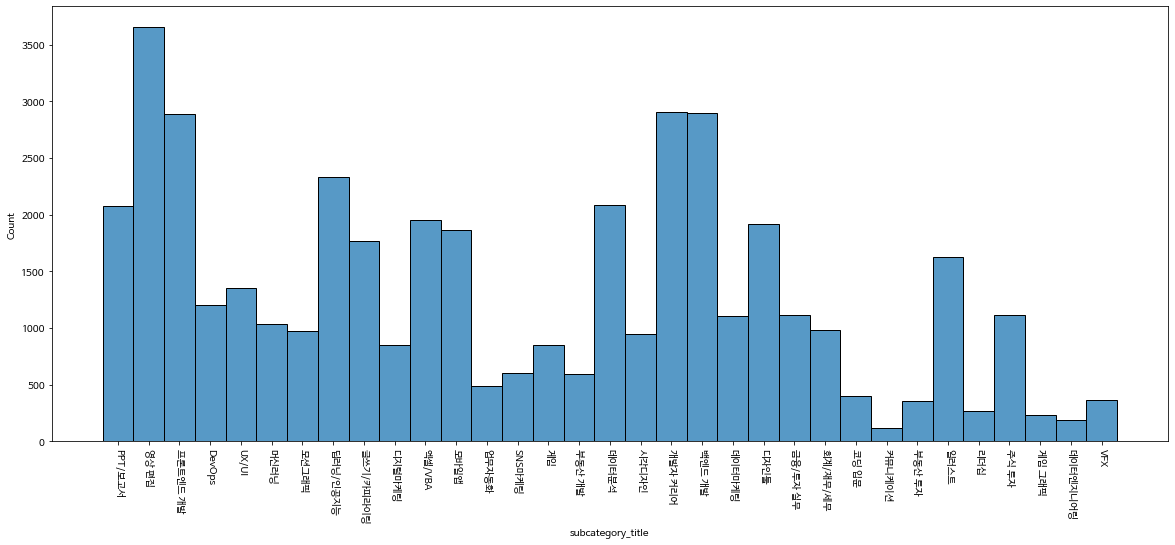

In [37]:
plt.figure(figsize=(20,8))
sns.histplot(data= data,  x='subcategory_title')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

강의 개설의 시간적 추의

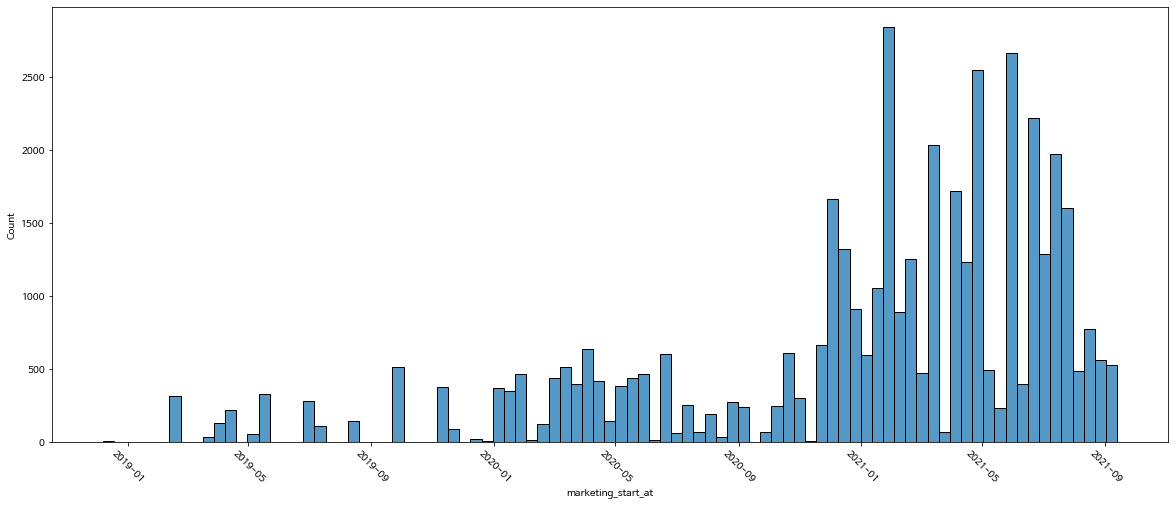

In [38]:
plt.figure(figsize=(20,8))
sns.histplot(data= data,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

상관계수로 분석

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


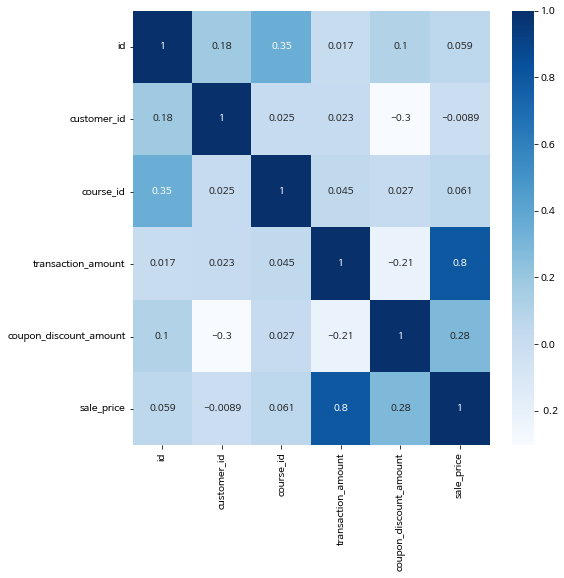

In [39]:
corr = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data = corr, cmap='Blues', annot=True)
plt.show()

쿠폰과 판매 수익과의 음의 상관관계 파악 가능

### format별 세부 내용 분석

format 안 'category_title'별 고객수, 수익

In [40]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum
}

data.groupby(['format','category_title']).agg(how)

customer_id  transaction_amount
format  category_title                                 
B2B     교육                        6            24347500
        데이터사이언스                  25           475971780
        마케팅                       3           124222500
        업무 생산성                    5            22025500
        크리에이티브                    6            59413500
        프로그래밍                   440            46747010
B2B 온라인 교육                      922          1135978045
        데이터사이언스                  15            65907774
        마케팅                       6             2760000
        부동산/금융                    5             2177500
        비즈니스                      1              360000
        업무 생산성                    1              480000
        크리에이티브                    9             3660000
        파이낸스                      1              480000
        프로그래밍                    20            16965000
B2G     마케팅                       1            20000000
        프로그래밍                   395             8921300
MBA     지식콘텐츠                    22             4970000
RED     데이터사이언스                 313            69105400
        마케팅                    1522           186580408
        업무 생산성                  104            17685000
        영상/3D                   276            44848400
        프로그래밍                  1062           163213155
관리      관리                        1              150000
스쿨      데이터사이언스                  79            14608693
        크리에이티브                    5            -2890833
        프로그래밍                     5           -13003206
스쿨 온라인  프로그래밍                   369            38529132
아카이브    크리에이티브                   35             1895700
온라인 완주반 데이터 사이언스                  5             1550000
        데이터사이언스                 362           105298520
        마케팅                     227            65202769
        비즈니스                      1              314000
        업무 생산성                  185            34225900
        크리에이티브                  339            77395418
        프로그래밍                   540           132878253
올인원     데이터사이언스                6149           771325932
        디자인                    5852           663198168
        마케팅                    3047           335400147
        부동산/금융                 2812           471823434
        비즈니스                     18             4620000
        업무 생산성                 5003           493982584
        영상/3D                  4955           499857805
        크리에이티브                  542           160690042
        투자/재테크                 1464           277706420
        파이낸스                     18             4620000
        프로그래밍                 13343          1313858001
이벤트     데이터사이언스                  19              814000
        마케팅                       7              440000
        부동산/금융                    4              242000
        크리에이티브                   18              892000
        프로그래밍                    41             2010000
캠프      데이터사이언스                  18            16320000
        부동산/금융                    4             1401500
        프로그래밍                     1             1350000
하루10분컷  비즈니스                      4               95865
        업무 생산성                 1355            26630441

format별 결제 금액과 환불 금액

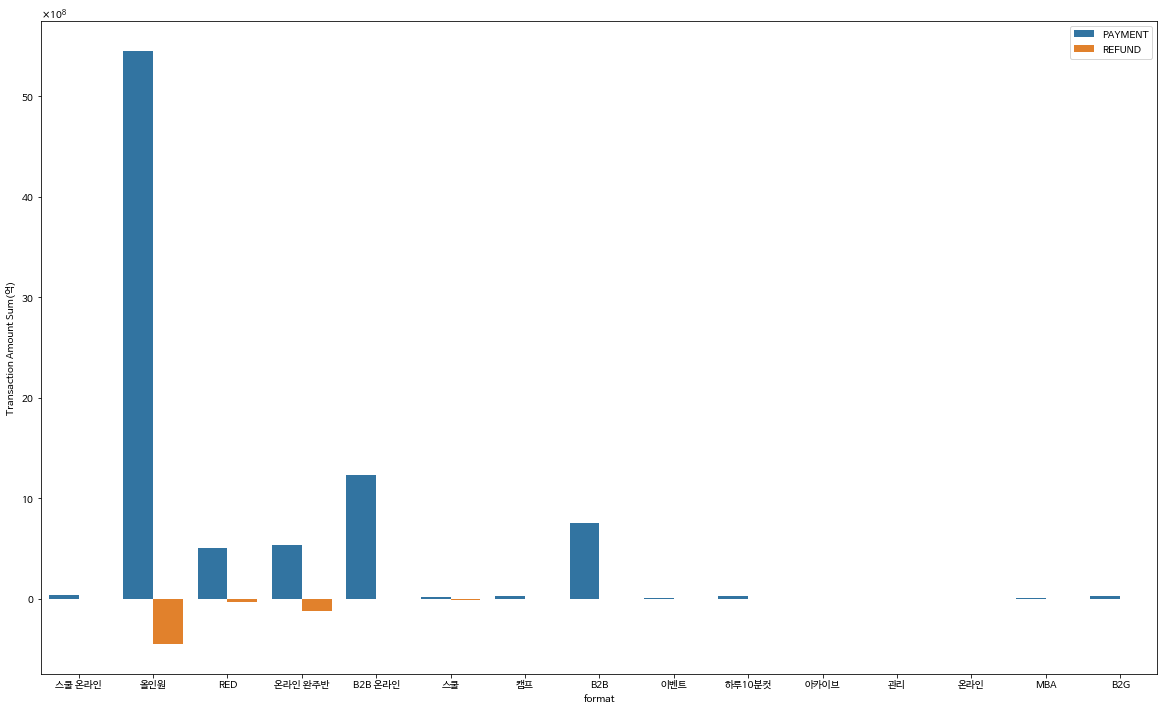

In [41]:
plt.figure(figsize=(20, 12))
sns.barplot(data=data, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.show()

format별 고객수, 수익 Bar Chart

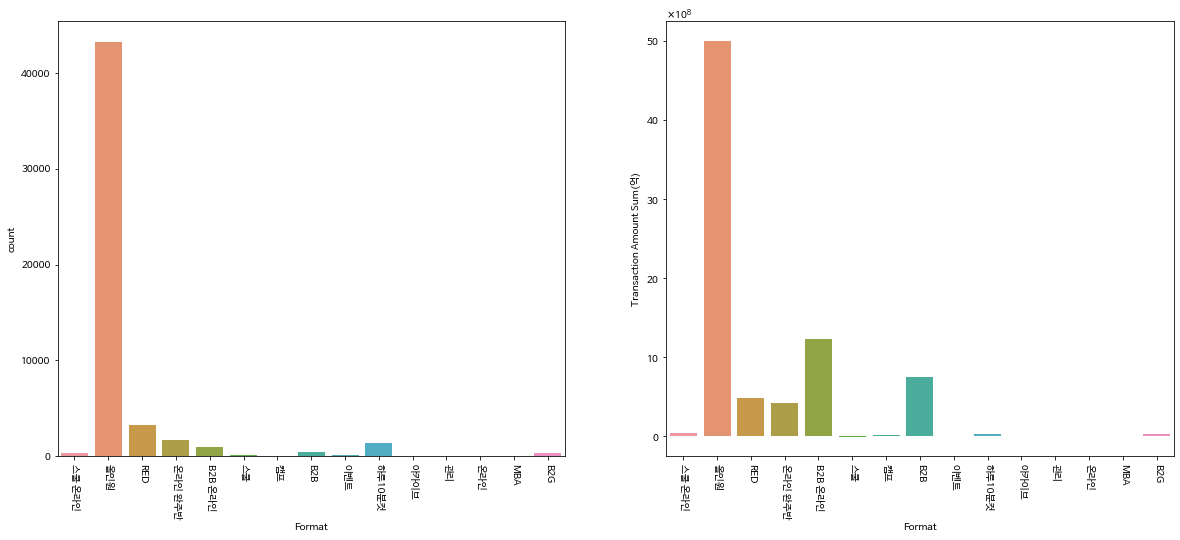

In [42]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='format')
plt.xticks(rotation=-90)
plt.xlabel('Format')


plt.subplot(1, 2, 2)
sns.barplot(data=data, x='format', y='transaction_amount',  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Sum(억)')

plt.show()

### format column 탐색

In [43]:
# format 컬럼에 대한 value_counts
data['format'].value_counts()

올인원        43205
RED         3277
온라인 완주반     1659
하루10분컷      1359
B2B 온라인      980
B2B          485
B2G          396
스쿨 온라인       369
스쿨            89
이벤트           89
아카이브          35
캠프            23
MBA           22
관리             1
온라인            1
Name: format, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


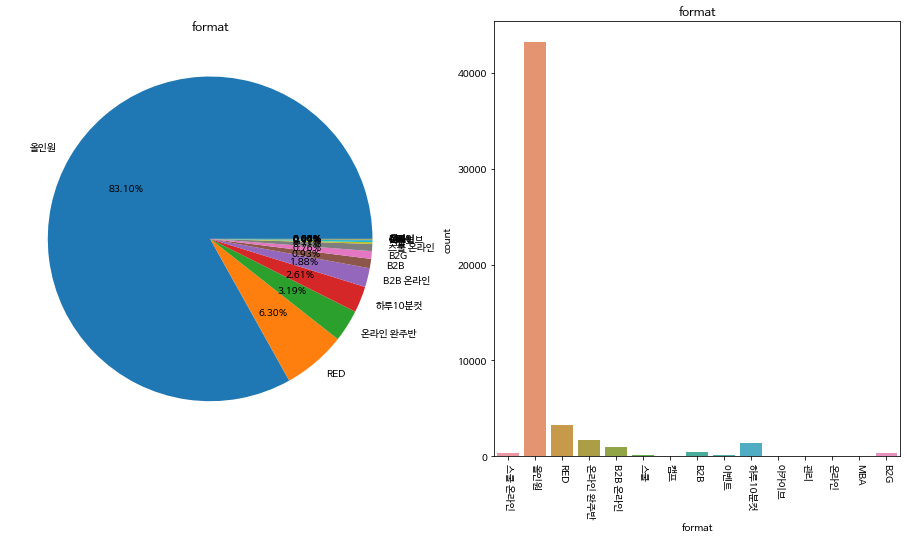

In [44]:
# format, category_title 시각화
fig = plt.figure(figsize=(16,8))
graph1 = fig.add_subplot(1,2,1)
data['format'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('format')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('format',data=data,ax=graph2)
graph2.set_title('format')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

In [45]:
# foramt 값이 올인원인 DataFrame
data[data['format']=='올인원']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서,2019-11-14,PG CARD
2,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집,2020-12-02,PG CARD
3,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,2020-11-27,PG CARD
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02,PG CARD
5,970682,478031.0,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56718,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,디자인툴,2021-04-23,INICIS CARD
56719,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,영상 편집,2020-12-02,KAKAO CARD
56720,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,백엔드 개발,2021-05-31,INICIS CARD
56721,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집,2021-06-15,INICIS VBANK


In [46]:
# format, category_title, customer_id, transaction_amount
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum,
}

data.groupby(['format','category_title']).agg(how)

customer_id  transaction_amount
format  category_title                                 
B2B     교육                        6            24347500
        데이터사이언스                  25           475971780
        마케팅                       3           124222500
        업무 생산성                    5            22025500
        크리에이티브                    6            59413500
        프로그래밍                   440            46747010
B2B 온라인 교육                      922          1135978045
        데이터사이언스                  15            65907774
        마케팅                       6             2760000
        부동산/금융                    5             2177500
        비즈니스                      1              360000
        업무 생산성                    1              480000
        크리에이티브                    9             3660000
        파이낸스                      1              480000
        프로그래밍                    20            16965000
B2G     마케팅                       1            20000000
        프로그래밍                   395             8921300
MBA     지식콘텐츠                    22             4970000
RED     데이터사이언스                 313            69105400
        마케팅                    1522           186580408
        업무 생산성                  104            17685000
        영상/3D                   276            44848400
        프로그래밍                  1062           163213155
관리      관리                        1              150000
스쿨      데이터사이언스                  79            14608693
        크리에이티브                    5            -2890833
        프로그래밍                     5           -13003206
스쿨 온라인  프로그래밍                   369            38529132
아카이브    크리에이티브                   35             1895700
온라인 완주반 데이터 사이언스                  5             1550000
        데이터사이언스                 362           105298520
        마케팅                     227            65202769
        비즈니스                      1              314000
        업무 생산성                  185            34225900
        크리에이티브                  339            77395418
        프로그래밍                   540           132878253
올인원     데이터사이언스                6149           771325932
        디자인                    5852           663198168
        마케팅                    3047           335400147
        부동산/금융                 2812           471823434
        비즈니스                     18             4620000
        업무 생산성                 5003           493982584
        영상/3D                  4955           499857805
        크리에이티브                  542           160690042
        투자/재테크                 1464           277706420
        파이낸스                     18             4620000
        프로그래밍                 13343          1313858001
이벤트     데이터사이언스                  19              814000
        마케팅                       7              440000
        부동산/금융                    4              242000
        크리에이티브                   18              892000
        프로그래밍                    41             2010000
캠프      데이터사이언스                  18            16320000
        부동산/금융                    4             1401500
        프로그래밍                     1             1350000
하루10분컷  비즈니스                      4               95865
        업무 생산성                 1355            26630441

In [47]:
how = {
    'course_id' : np.count_nonzero,
    'transaction_amount' : np.sum,
}
data[data['format']=='올인원'].groupby(['category_title','subcategory_title']).agg(how)

course_id  transaction_amount
category_title subcategory_title                               
데이터사이언스        데이터분석                   2004           188695932
               데이터엔지니어링                 101            26661200
               딥러닝/인공지능                2186           257290244
               머신러닝                    1016           103534417
디자인            UX/UI                   1357           155433974
               디자인툴                    1915           213610638
               시각디자인                    947           112498491
               일러스트                    1624           176255065
마케팅            SNS마케팅                   605            53498477
               글쓰기/카피라이팅                244            21208067
               데이터마케팅                  1104            99145677
               디지털마케팅                   848            94949573
부동산/금융         금융/투자 실무                1111           166818285
               부동산 개발                   593            68780284
               회계/재무/세무                 981           199633865
업무 생산성         PPT/보고서                 2073           192161350
               리더십                      162            15833880
               업무자동화                    485            44671329
               엑셀/VBA                  1951           183819625
               커뮤니케이션                   121             3983400
영상/3D          VFX                      249            31170238
               게임 그래픽                   233            27967300
               모션그래픽                    973           104610959
               영상 편집                   3497           334309308
투자/재테크         부동산 투자                   352            47798134
               주식 투자                   1112           229908286
프로그래밍          DevOps                   794            77064228
               개발자 커리어                 2689           220284838
               게임                       849            90003238
               모바일앱                    1844           169841512
               백엔드 개발                  2760           261133004
               코딩 입문                    400            37182233
               프론트엔드 개발                2608           245590580

### type, state columns 탐색

In [48]:
# type value_counts
data['type'].value_counts()

PAYMENT    48181
REFUND      3809
Name: type, dtype: int64

In [49]:
# state value_counts
data['state'].value_counts()

COMPLETED    51990
Name: state, dtype: int64

In [50]:
# type==payment, state==completed 값 갖는 course_id 값
con = (data.type=='PAYMENT')&(data.state=='COMPLETED')
data[con].course_id

0        204246.0
1        201797.0
2        203178.0
3        203644.0
4        203720.0
           ...   
56718    204286.0
56719    203178.0
56720    203935.0
56721    205365.0
56722    206720.0
Name: course_id, Length: 48181, dtype: float64

In [51]:
# type==REFUND, state==COMPLETED 값 갖는 course_id 값
con = (data.type=='REFUND')&(data.state=='COMPLETED')
data[con].course_id

266      204122.0
267      203178.0
275      203989.0
278      204264.0
280           NaN
           ...   
56543    206065.0
56546         NaN
56573    206720.0
56602    205569.0
56605    203525.0
Name: course_id, Length: 3809, dtype: float64

### 환불률 탐색

In [52]:
# 환불이 승인된 데이터프레임
cond_refund = (data['type']== 'REFUND') & (data['state'] == 'COMPLETED')
data[cond_refund]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
266,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,NaN,NaT,PG VBANK
267,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,영상 편집,2020-12-02,PG CARD
275,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,일러스트,2021-02-19,PG CARD
278,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,NaN,2021-03-08,PG VBANK
280,972436,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56543,1363708,600073.0,206065.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,NaN,NaN,179000.0,백엔드 개발,2021-07-15,NAVER CARD
56546,1363721,645911.0,NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,NaN,NaT,INICIS CARD
56573,1363934,506356.0,206720.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,NaN,NaN,259000.0,영상 편집,2021-08-17,NAVER CARD
56602,1364149,604077.0,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,129000.0,엑셀/VBA,2021-08-17,KAKAO POINT


In [53]:
# 결제가 승인된 데이터 프레임
cond_payment = (data['type']== 'PAYMENT') & (data['state'] == 'COMPLETED')
data[cond_payment]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04,PG CARD
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서,2019-11-14,PG CARD
2,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집,2020-12-02,PG CARD
3,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,2020-11-27,PG CARD
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56718,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,디자인툴,2021-04-23,INICIS CARD
56719,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,영상 편집,2020-12-02,KAKAO CARD
56720,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,백엔드 개발,2021-05-31,INICIS CARD
56721,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집,2021-06-15,INICIS VBANK


In [54]:
# 결측치 처리 (결측치 1개 존재 : 강의 타이틀에 프로모션이 존재해서 프로모션으로 정함)
data[data['format'].isna()] = '프로모션'
# format array화
format_array = data['format'].unique()

for i in format_array:
    cond = (data['format'] == i)
    # 결제승인
    data[cond][cond_payment]
    # 환불승인
    data[cond][cond_refund]
    # 결제승인 갯수 = 전체 갯수
    payment = len(data[cond][cond_payment].index)
    # 환불승인 갯수
    refund = len(data[cond][cond_refund].index)
    if refund != 0 and payment != 0:
        refund_ratio = refund / payment * 100
    elif payment == 0:
        refund_ratio = 0
        print(f'{i}의 payment가 0')
    else:
        refund_ratio = 0
        print(f'{i}의 refund가 0')
    refund_ratio = round(refund_ratio, 3)
    print(f'format : "{i}"의 환불률은 {refund_ratio}% 입니다.')

format : "스쿨 온라인"의 환불률은 12.5% 입니다.
format : "올인원"의 환불률은 7.604% 입니다.
format : "RED"의 환불률은 5.404% 입니다.
format : "온라인 완주반"의 환불률은 22.798% 입니다.
format : "B2B 온라인"의 환불률은 0.719% 입니다.
format : "스쿨"의 환불률은 12.658% 입니다.
format : "캠프"의 환불률은 21.053% 입니다.
format : "B2B"의 환불률은 22.475% 입니다.
format : "이벤트"의 환불률은 8.537% 입니다.
format : "하루10분컷"의 환불률은 2.411% 입니다.
format : "아카이브"의 환불률은 12.903% 입니다.
관리의 refund가 0
format : "관리"의 환불률은 0% 입니다.
온라인의 payment가 0
format : "온라인"의 환불률은 0% 입니다.
MBA의 refund가 0
format : "MBA"의 환불률은 0% 입니다.
format : "B2G"의 환불률은 27.331% 입니다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


### 결제와 환불

In [55]:
# 결제와 환불 상태에 따른 고객 수
how = {
    'customer_id' : np.count_nonzero
}
data.groupby(['type','state']).agg(how)

,,customer_id
type,state,
PAYMENT,COMPLETED,48181
REFUND,COMPLETED,3809


In [56]:
# 결제 환불 상태와 강의 명에 따른 고객 수
how = {
    'customer_id' : np.count_nonzero
}
data.groupby(['type','state', 'course_id']).agg(how)

customer_id
type    state     course_id             
PAYMENT COMPLETED 200260.0           115
                  200328.0           269
                  200399.0            32
                  200486.0           105
                  200543.0           194
...                                  ...
REFUND  COMPLETED 207169.0             1
                  207343.0             8
                  207648.0             1
                  207651.0             2
                  207655.0             1

[1578 rows x 1 columns]

### 고객과 강의 탐색

In [57]:
# customer_id 컬럼에 대한 value_counts
data['customer_id'].value_counts()

98685.0     48
50769.0     39
40783.0     30
20784.0     26
65665.0     26
            ..
547371.0     1
70365.0      1
547346.0     1
547347.0     1
610626.0     1
Name: customer_id, Length: 38129, dtype: int64

In [58]:
# course_id 컬럼에 대한 value_counts
data['course_id'].value_counts()

203720.0    1520
203178.0    1200
203525.0    1157
204670.0    1107
205080.0     785
            ... 
205680.0       1
205677.0       1
205690.0       1
205679.0       1
207742.0       1
Name: course_id, Length: 1292, dtype: int64

In [59]:
# value_counts 가 가장 높은 강의 '203720' Data Frame
data[data['course_id']==203720]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
14,970730,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
22,970795,477890.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:55:41,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
32,970892,478134.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 17:57:43,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
118,971530,477986.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 21:58:21,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56404,1362298,73245.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-23 22:34:24,179000,NaN,NaN,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS CARD
56429,1362871,669847.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 00:49:49,179000,NaN,NaN,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS VBANK
56532,1363645,262264.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 14:18:52,179000,NaN,NaN,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS CARD
56624,1364333,660535.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 18:50:23,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS CARD


In [60]:
# value_counts 가 가장 높은 강의 '203720' Data Frame
data[data['course_id']==203720]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
14,970730,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
22,970795,477890.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:55:41,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
32,970892,478134.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 17:57:43,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
118,971530,477986.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 21:58:21,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발,2021-02-02 00:00:00,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56404,1362298,73245.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-23 22:34:24,179000,NaN,NaN,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS CARD
56429,1362871,669847.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 00:49:49,179000,NaN,NaN,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS VBANK
56532,1363645,262264.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 14:18:52,179000,NaN,NaN,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS CARD
56624,1364333,660535.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 18:50:23,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,프론트엔드 개발,2021-02-02 00:00:00,INICIS CARD


In [61]:
data[data['course_id'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
5,970682,478031.0,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
18,970750,478091.0,NaN,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
21,970789,478098.0,NaN,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 16:52:29,299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
36,970947,271544.0,NaN,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 18:15:38,299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
38,970968,458508.0,NaN,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 한끝세트 (3월 프리패스),부동산/금융,올인원,2021-03-28 18:22:16,299000,NaN,NaN,299000.0,NaN,NaT,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,1363721,645911.0,NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,NaN,NaT,INICIS CARD
56614,1359426,667514.0,NaN,PAYMENT,COMPLETED,프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스),프로그래밍,올인원,2021-09-24 17:57:12,1800000,NaN,NaN,1800000.0,NaN,NaT,INICIS VBANK
56625,1364334,436116.0,NaN,PAYMENT,COMPLETED,프로모션 : 데이터 분석 맥북 air 패스(9월 현물 프리패스),데이터사이언스,올인원,2021-09-24 18:53:00,1400000,NaN,NaN,1400000.0,NaN,NaT,INICIS CARD
56716,1364929,120686.0,NaN,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,2021-09-25 12:29:39,481000,NaN,NaN,481000.0,NaN,NaT,INICIS CARD


In [62]:
data.isna().sum()

id                            0
customer_id                   0
course_id                  2154
type                          0
state                         0
course_title                  0
category_title                3
format                        0
completed_at                  0
transaction_amount            0
coupon_title              31753
coupon_discount_amount    31753
sale_price                 1079
subcategory_title          8905
marketing_start_at         8954
payment_data                  0
dtype: int64

### 분류별 강의 수

In [63]:
# 분류별 강의 수
how = {
    'course_title' : np.count_nonzero
}
data.groupby(['category_title','subcategory_title']).agg(how)

course_title
category_title subcategory_title              
데이터사이언스        데이터분석                      2083
               데이터엔지니어링                    188
               딥러닝/인공지능                   2334
               머신러닝                       1033
디자인            UX/UI                      1357
               디자인툴                       1915
               시각디자인                       947
               일러스트                       1624
마케팅            SNS마케팅                      605
               글쓰기/카피라이팅                  1766
               데이터마케팅                     1104
               디지털마케팅                      848
부동산/금융         금융/투자 실무                   1111
               부동산 개발                      593
               회계/재무/세무                    981
업무 생산성         PPT/보고서                    2073
               리더십                         266
               업무자동화                       485
               엑셀/VBA                     1951
               커뮤니케이션                      121
영상/3D          VFX                         367
               게임 그래픽                      233
               모션그래픽                       973
               영상 편집                      3655
투자/재테크         부동산 투자                      352
               주식 투자                      1112
프로그래밍          DevOps                     1206
               개발자 커리어                    2906
               게임                          849
               모바일앱                       1862
               백엔드 개발                     2895
               코딩 입문                       400
               프론트엔드 개발                   2890

In [64]:
# 분류 별 수익
how = {
    'transaction_amount' : np.sum
}
data.groupby(['category_title','subcategory_title']).agg(how)

transaction_amount
category_title subcategory_title                    
데이터사이언스        데이터분석                       216797932
               데이터엔지니어링                     49228400
               딥러닝/인공지능                    285845244
               머신러닝                        109735617
디자인            UX/UI                       155433974
               디자인툴                        213610638
               시각디자인                       112498491
               일러스트                        176255065
마케팅            SNS마케팅                       53498477
               글쓰기/카피라이팅                   207788475
               데이터마케팅                       99145677
               디지털마케팅                       94949573
부동산/금융         금융/투자 실무                    166818285
               부동산 개발                       68780284
               회계/재무/세무                    199633865
업무 생산성         PPT/보고서                     192161350
               리더십                          33518880
               업무자동화                        44671329
               엑셀/VBA                      183819625
               커뮤니케이션                        3983400
영상/3D          VFX                          53105538
               게임 그래픽                       27967300
               모션그래픽                       104610959
               영상 편집                       357222408
투자/재테크         부동산 투자                       47798134
               주식 투자                       229908286
프로그래밍          DevOps                      139486940
               개발자 커리어                     250670681
               게임                           90003238
               모바일앱                        172315912
               백엔드 개발                      287568004
               코딩 입문                        37182233
               프론트엔드 개발                    288845590

### 분류별 payment와 refund

In [65]:
# 데이터 로딩 및 확인
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/데이터분석프로젝트_VER2_210329_210926.csv", encoding='cp949')

In [66]:
# tax_free_amount 삭제
df = df.drop('tax_free_amount', axis = 1)
# type이 ORDER인 행 제거
cond = df[df['type']=='ORDER'].index
df = df.drop(cond)
# type이 TRANSACTION인 행 제거
cond = df[df['type']=='TRANSACTION'].index
df = df.drop(cond)
# state가 PENDING인 행 제거
cond = df[df['state']=='PENDING'].index
df = df.drop(cond)
# state가 CANCELLED인 행 제거
cond = df[df['state']=='CANCELLED'].index
df = df.drop(cond)
# state가 DELETED인 행 제거
cond = df[df['state']=='DELETED'].index
df = df.drop(cond)

In [67]:
df[df['format'].isna()] = '프로모션'
cond = df[df['state']=='프로모션'].index
df = df.drop(cond)
# PAYMENT 금액 가져오기
df3 = df


cond = df3[df3['state']=='REQUESTED'].index
df3 = df3.drop(cond)

cond = df3[df3['state']=='프로모션'].index
df3 = df3.drop(cond)

cond = df3[df3['type']=='REFUND'].index
df3 = df3.drop(cond)
payment_list = []
how5 = {
    'transaction_amount' : np.sum,
}
df3.groupby(['format','type','state']).agg(how5)
for i in range(14):
    payment_list.append(df3.groupby(['format','type','state']).agg(how5).iloc[i,0])
payment_list.insert(9,0)

# REFUND 금액 가져오기
df4 = df

cond = df4[df4['state']=='REQUESTED'].index
df4 = df4.drop(cond)

cond = df4[df4['state']=='프로모션'].index
df4 = df4.drop(cond)

cond = df4[df4['type']=='PAYMENT'].index
df4 = df4.drop(cond)
df4.groupby(['format','type','state']).agg(how5)
refund_list = []
how5 = {
    'transaction_amount' : np.sum,
}
df4.groupby(['format','type','state']).agg(how5)
for i in range(13):
    refund_list.append(df4.groupby(['format','type','state']).agg(how5).iloc[i,0])
refund_list.insert(3,0)
refund_list.insert(5,0)


df5 = pd.DataFrame(
    data = {'PAYMENT' : payment_list, 
            'REFUND' : refund_list},
    index = np.sort(df['format'].unique(), axis=0),
    columns=['PAYMENT','REFUND']
)
df5

,PAYMENT,REFUND
B2B,755932780,-3204990
B2B 온라인,1232648319,-3880000
B2G,31846300,-2925000
MBA,4970000,0
RED,509463500,-28031137
관리,150000,0
스쿨,14608693,-15894039
스쿨 온라인,42034660,-3505528
아카이브,2181900,-286200
온라인,0,-199000


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


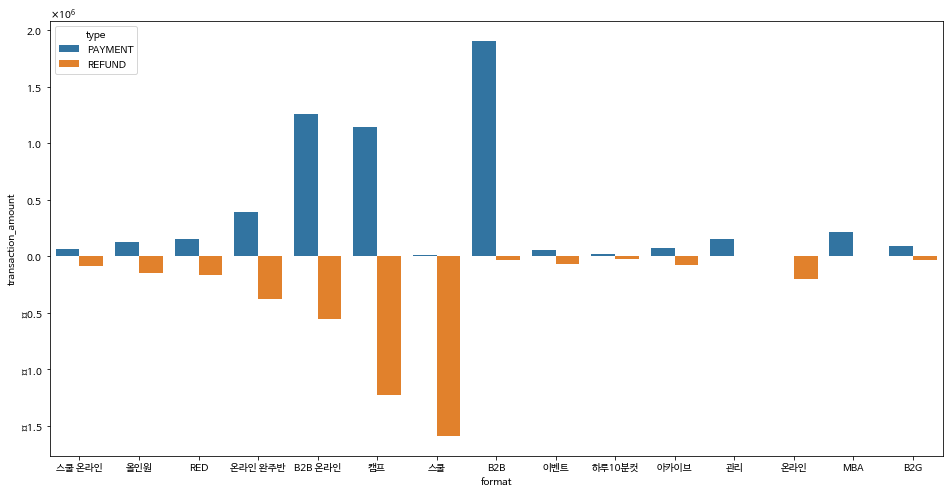

In [68]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True,)
plt.show()

### format 나머지 분석 ('스쿨 온라인', '캠프', '스쿨', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', '프로모션', 'MBA', 'B2G')

In [69]:
data['format'].unique()

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '스쿨', '캠프', 'B2B',
       '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', 'B2G'], dtype=object)

In [70]:
# format == 스쿨 온라인 
data[data['format']=='스쿨 온라인'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 36472
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      369 non-null    object
 1   customer_id             369 non-null    object
 2   course_id               369 non-null    object
 3   type                    369 non-null    object
 4   state                   369 non-null    object
 5   course_title            369 non-null    object
 6   category_title          369 non-null    object
 7   format                  369 non-null    object
 8   completed_at            369 non-null    object
 9   transaction_amount      369 non-null    object
 10  coupon_title            63 non-null     object
 11  coupon_discount_amount  63 non-null     object
 12  sale_price              369 non-null    object
 13  subcategory_title       0 non-null      object
 14  marketing_start_at      131 non-null    object
 15  paym

In [156]:
data1 = data[data['format']=='스쿨 온라인']

In [155]:
data1

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04 00:00:00,PG CARD
73,971265,175430.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 20:39:29,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
110,971482,473334.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:40:24,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
117,971527,478402.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:57:31,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
119,971536,271507.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:59:54,171810,[10% 할인] 프론트엔드 실무 완성편,19090.0,190900.0,NaN,2021-03-04 00:00:00,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27751,1155847,561627.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-06-21 21:16:36,144300,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
27775,1156069,154959.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-21 23:27:08,192400,NaN,NaN,192400.0,NaN,2021-03-04 00:00:00,KAKAO CARD
33351,1206857,429700.0,203986.0,REFUND,COMPLETED,시크릿 코드 : 프론트엔드 UI 컴포넌트편,프로그래밍,스쿨 온라인,2021-07-09 16:48:02,-71188,NaN,NaN,79000.0,NaN,2021-01-11 00:00:00,PG CARD
34601,1218798,490371.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-07-15 18:20:31,-141900,NaN,NaN,191900.0,NaN,2021-03-04 00:00:00,INICIS CARD


In [154]:
data1['transaction_amount'].value_counts()

 111000    74
 122100    44
 144300    35
 142400    26
 133200    23
 192400    20
 14800     16
 191400    15
 173160    13
-33000     12
 141900     7
 191900     7
 190900     7
 85000      7
 172710     6
 51800      5
-14800      5
 14060      5
-122100     4
-192400     3
 172260     3
 171810     2
 39960      2
-144300     2
 62900      2
-142400     2
 141400     2
 132400     1
-71188      1
-111000     1
-34500      1
 1000       1
-133200     1
-173160     1
 97400      1
-11100      1
 13320      1
-111300     1
 12580      1
-33300      1
 93400      1
-39960      1
-172710     1
-191400     1
 92400      1
-171810     1
-141900     1
Name: transaction_amount, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


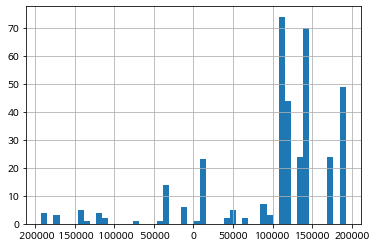

In [153]:
data1['transaction_amount'].hist(bins=50)

In [152]:
data1[data1['transaction_amount']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      0 non-null      object
 1   customer_id             0 non-null      object
 2   course_id               0 non-null      object
 3   type                    0 non-null      object
 4   state                   0 non-null      object
 5   course_title            0 non-null      object
 6   category_title          0 non-null      object
 7   format                  0 non-null      object
 8   completed_at            0 non-null      object
 9   transaction_amount      0 non-null      object
 10  coupon_title            0 non-null      object
 11  coupon_discount_amount  0 non-null      object
 12  sale_price              0 non-null      object
 13  subcategory_title       0 non-null      object
 14  marketing_start_at      0 non-null      object
 15  payment_data      

In [151]:
data1[data1['transaction_amount']==0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data


In [150]:
data1[data1['transaction_amount']==0].sale_price.value_counts()

Series([], Name: sale_price, dtype: int64)

In [149]:
data1[data1['transaction_amount']==0].coupon_discount_amount.value_counts()

Series([], Name: coupon_discount_amount, dtype: int64)

In [148]:
data1[data1['transaction_amount']==0].coupon_title.value_counts()

Series([], Name: coupon_title, dtype: int64)

In [147]:
con = (df_school_online.transaction_amount==0) & (df_school_online.sale_price==1.0)
data1[con]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data


In [146]:
data1[con]['course_title'].value_counts()

Series([], Name: course_title, dtype: int64)

data1['transaction_amount']==0 에 해당하는 강의는 총 274개이고 그중에 245개는 샘플 강의, 29개는 쿠폰

In [83]:
data1[data1['transaction_amount']==0]['type'].unique()

array([], dtype=object)

In [84]:
data1[data1['type']=='PAYMENT'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 27775
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      328 non-null    object
 1   customer_id             328 non-null    object
 2   course_id               328 non-null    object
 3   type                    328 non-null    object
 4   state                   328 non-null    object
 5   course_title            328 non-null    object
 6   category_title          328 non-null    object
 7   format                  328 non-null    object
 8   completed_at            328 non-null    object
 9   transaction_amount      328 non-null    object
 10  coupon_title            63 non-null     object
 11  coupon_discount_amount  63 non-null     object
 12  sale_price              328 non-null    object
 13  subcategory_title       0 non-null      object
 14  marketing_start_at      119 non-null    object
 15  paym

In [85]:
data1[data1['type']=='REFUND'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 315 to 36472
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      41 non-null     object
 1   customer_id             41 non-null     object
 2   course_id               41 non-null     object
 3   type                    41 non-null     object
 4   state                   41 non-null     object
 5   course_title            41 non-null     object
 6   category_title          41 non-null     object
 7   format                  41 non-null     object
 8   completed_at            41 non-null     object
 9   transaction_amount      41 non-null     object
 10  coupon_title            0 non-null      object
 11  coupon_discount_amount  0 non-null      object
 12  sale_price              41 non-null     object
 13  subcategory_title       0 non-null      object
 14  marketing_start_at      12 non-null     object
 15  pay

In [86]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data1.groupby(['category_title', 'type']).agg(how)

id  transaction_amount
category_title type                            
프로그래밍          PAYMENT  328            42034660
               REFUND    41            -3505528

In [120]:
data1['category_title'].value_counts()

프로그래밍    369
Name: category_title, dtype: int64

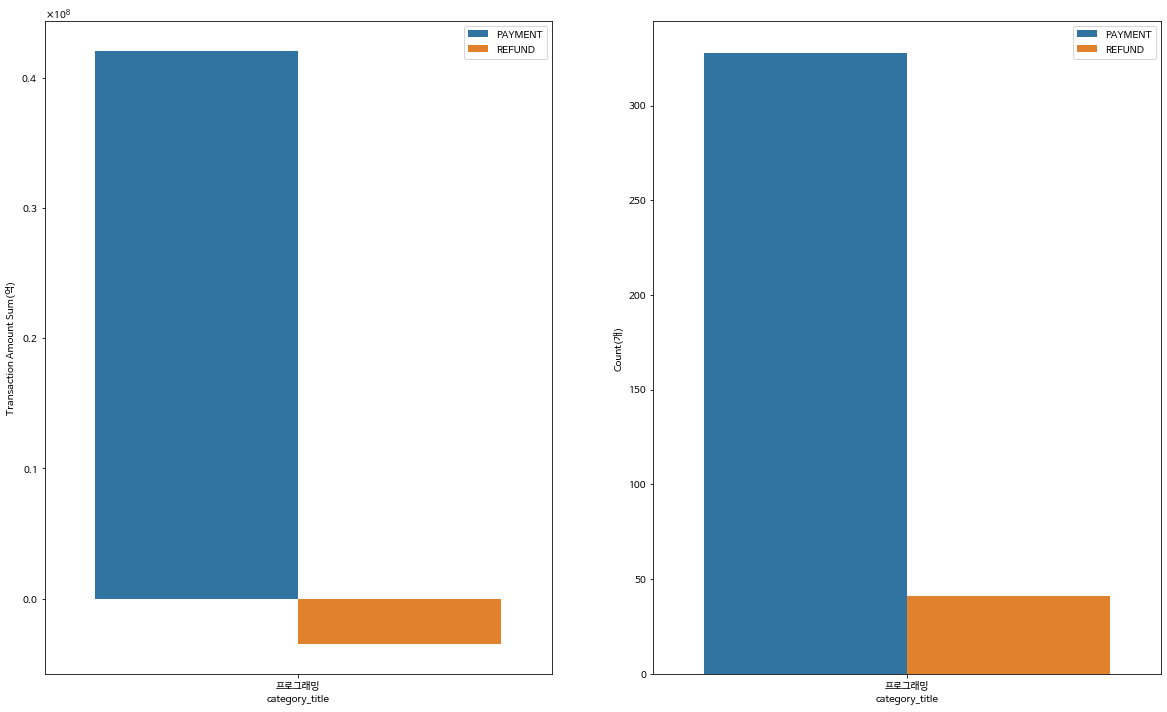

In [89]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data1, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data1, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

In [161]:
data1_PAYMENT = data1[data1['type']=='PAYMENT']

In [163]:
data1_PAYMENT

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04 00:00:00,PG CARD
73,971265,175430.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 20:39:29,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
110,971482,473334.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:40:24,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
117,971527,478402.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:57:31,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
119,971536,271507.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:59:54,171810,[10% 할인] 프론트엔드 실무 완성편,19090.0,190900.0,NaN,2021-03-04 00:00:00,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27169,1152033,566020.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-20 01:21:37,192400,NaN,NaN,192400.0,NaN,2021-03-04 00:00:00,KAKAO CARD
27259,1152721,58285.0,204686.0,PAYMENT,COMPLETED,스프링 아카데미아 강의 9 - 직접 적용해보는 TDD와 Spring Boot,프로그래밍,스쿨 온라인,2021-06-20 15:55:06,14800,NaN,NaN,14800.0,NaN,NaT,KAKAO POINT
27430,1153750,529340.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-06-20 22:34:12,192400,NaN,NaN,192400.0,NaN,2021-03-04 00:00:00,INICIS CARD
27751,1155847,561627.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-06-21 21:16:36,144300,NaN,NaN,144300.0,NaN,NaT,INICIS CARD


In [171]:
data1_PAYMENT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 27775
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      328 non-null    object
 1   customer_id             328 non-null    object
 2   course_id               328 non-null    object
 3   type                    328 non-null    object
 4   state                   328 non-null    object
 5   course_title            328 non-null    object
 6   category_title          328 non-null    object
 7   format                  328 non-null    object
 8   completed_at            328 non-null    object
 9   transaction_amount      328 non-null    object
 10  coupon_title            63 non-null     object
 11  coupon_discount_amount  63 non-null     object
 12  sale_price              328 non-null    object
 13  subcategory_title       0 non-null      object
 14  marketing_start_at      119 non-null    object
 15  paym

In [162]:
data1_REFUND = data1[data1['type']=='REFUND']

In [170]:
data1_REFUND

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
315,972662,271507.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-29 10:28:46,-171810,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
3723,992790,33110.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-05 11:27:31,-191400,NaN,NaN,191400.0,NaN,2021-03-04 00:00:00,PG CARD
5682,1006441,104842.0,204246.0,REFUND,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-12 12:59:16,-172710,NaN,NaN,191900.0,NaN,2021-03-04 00:00:00,INICIS CARD
5763,1006949,138095.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-12 16:37:19,-39960,NaN,NaN,39960.0,NaN,NaT,INICIS CARD
6117,1009712,170805.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-14 13:47:29,-144300,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
6174,1010110,38941.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-14 17:17:29,-11100,NaN,NaN,62900.0,NaN,NaT,INICIS CARD
6175,1010114,426199.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-14 17:20:45,-33300,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
6176,1010120,464639.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-14 17:21:53,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
6178,1010129,21944.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-14 17:25:36,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
6179,1010131,388201.0,204245.0,REFUND,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-14 17:27:54,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD


In [172]:
data1_REFUND.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 315 to 36472
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      41 non-null     object
 1   customer_id             41 non-null     object
 2   course_id               41 non-null     object
 3   type                    41 non-null     object
 4   state                   41 non-null     object
 5   course_title            41 non-null     object
 6   category_title          41 non-null     object
 7   format                  41 non-null     object
 8   completed_at            41 non-null     object
 9   transaction_amount      41 non-null     object
 10  coupon_title            0 non-null      object
 11  coupon_discount_amount  0 non-null      object
 12  sale_price              41 non-null     object
 13  subcategory_title       0 non-null      object
 14  marketing_start_at      12 non-null     object
 15  pay

In [200]:
data1_INNER_JOIN = pd.merge(data1_PAYMENT, data1_REFUND, left_on='course_title'and'customer_id', right_on='course_title'and'customer_id', how='inner')

In [201]:
data1_INNER_JOIN

,id_x,customer_id,course_id_x,type_x,state_x,course_title_x,category_title_x,format_x,completed_at_x,transaction_amount_x,...,category_title_y,format_y,completed_at_y,transaction_amount_y,coupon_title_y,coupon_discount_amount_y,sale_price_y,subcategory_title_y,marketing_start_at_y,payment_data_y
0,971536,271507.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:59:54,171810,...,프로그래밍,스쿨 온라인,2021-03-29 10:28:46,-171810,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
1,997171,490371.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-07 22:22:58,141900,...,프로그래밍,스쿨 온라인,2021-07-15 18:20:31,-141900,NaN,NaN,191900.0,NaN,2021-03-04 00:00:00,INICIS CARD
2,1001842,456068.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-09 23:27:16,144300,...,프로그래밍,스쿨 온라인,2021-04-19 15:13:02,-111300,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
3,1002049,430994.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-10 05:24:44,144300,...,프로그래밍,스쿨 온라인,2021-04-14 17:56:19,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
4,1002301,417924.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-10 12:22:53,144300,...,프로그래밍,스쿨 온라인,2021-04-14 18:05:36,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS VBANK
5,1002382,444476.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-10 13:16:02,144300,...,프로그래밍,스쿨 온라인,2021-04-14 17:52:18,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
6,1003172,388201.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-10 23:08:58,144300,...,프로그래밍,스쿨 온라인,2021-04-14 17:27:54,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
7,1003679,35522.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-04-11 11:36:13,172710,...,프로그래밍,스쿨 온라인,2021-04-14 17:52:38,-33000,NaN,NaN,144300.0,NaN,NaT,INICIS CARD
8,1003847,38941.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-11 12:54:17,62900,...,프로그래밍,스쿨 온라인,2021-04-14 17:17:29,-11100,NaN,NaN,62900.0,NaN,NaT,INICIS CARD
9,1006922,138095.0,204245.0,PAYMENT,COMPLETED,스프링 아카데미아,프로그래밍,스쿨 온라인,2021-04-12 16:25:09,39960,...,프로그래밍,스쿨 온라인,2021-04-12 16:37:19,-39960,NaN,NaN,39960.0,NaN,NaT,INICIS CARD


In [202]:
data1_INNER_JOIN['course_title_y']

0                                  시크릿코드 : 프론트엔드 실무 완성편
1                                  시크릿코드 : 프론트엔드 실무 완성편
2                                             스프링 아카데미아
3                                             스프링 아카데미아
4                                             스프링 아카데미아
5                                             스프링 아카데미아
6                                             스프링 아카데미아
7                                             스프링 아카데미아
8                                             스프링 아카데미아
9                                             스프링 아카데미아
10                                            스프링 아카데미아
11                                            스프링 아카데미아
12                                            스프링 아카데미아
13                                 시크릿코드 : 프론트엔드 실무 완성편
14                                            스프링 아카데미아
15    스프링 아카데미아 강의 11 - Spring Security를 활용한 OAuth F...
16    스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통한 서비...
17    스프링 아카데미아 강의 11 - Spring Security를 활용한 OAu

In [203]:
data1_INNER_JOIN['course_title_x']

0                                  시크릿코드 : 프론트엔드 실무 완성편
1                                  시크릿코드 : 프론트엔드 실무 완성편
2                                             스프링 아카데미아
3                                             스프링 아카데미아
4                                             스프링 아카데미아
5                                             스프링 아카데미아
6                                             스프링 아카데미아
7                                  시크릿코드 : 프론트엔드 실무 완성편
8                                             스프링 아카데미아
9                                             스프링 아카데미아
10                                            스프링 아카데미아
11                                            스프링 아카데미아
12                                            스프링 아카데미아
13                                 시크릿코드 : 프론트엔드 실무 완성편
14                                            스프링 아카데미아
15                                            스프링 아카데미아
16                                            스프링 아카데미아
17    스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통

In [173]:
data1_INNER_JOIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_x                      29 non-null     object
 1   customer_id               29 non-null     object
 2   course_id_x               29 non-null     object
 3   type_x                    29 non-null     object
 4   state_x                   29 non-null     object
 5   course_title_x            29 non-null     object
 6   category_title_x          29 non-null     object
 7   format_x                  29 non-null     object
 8   completed_at_x            29 non-null     object
 9   transaction_amount_x      29 non-null     object
 10  coupon_title_x            6 non-null      object
 11  coupon_discount_amount_x  6 non-null      object
 12  sale_price_x              29 non-null     object
 13  subcategory_title_x       0 non-null      object
 14  marketing_start_at_x      8 

--------------------------------------------------------------------

In [116]:
# '스쿨 온라인', '캠프', '스쿨', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', 'B2G'
con = (data['format']=='스쿨 온라인')|(data['format']=='캠프')|(data['format']=='스쿨')|(data['format']=='이벤트')|(data['format']=='하루10분컷')|(data['format']=='아카이브')|(data['format']=='관리')|(data['format']=='온라인')|(data['format']=='MBA')|(data['format']=='B2G')

data2 = data[con]

In [117]:
data2

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,2021-03-04 00:00:00,PG CARD
73,971265,175430.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 20:39:29,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
110,971482,473334.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:40:24,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
117,971527,478402.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:57:31,190900,NaN,NaN,190900.0,NaN,2021-03-04 00:00:00,PG CARD
119,971536,271507.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 21:59:54,171810,[10% 할인] 프론트엔드 실무 완성편,19090.0,190900.0,NaN,2021-03-04 00:00:00,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56581,1363994,670297.0,207651.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-24 16:29:55,30000,NaN,NaN,30000.0,NaN,NaT,INICIS CARD
56610,1364240,277200.0,207654.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-09-24 17:48:08,40000,NaN,NaN,40000.0,NaN,NaT,INICIS CARD
56660,1364604,668910.0,207652.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-24 23:39:18,30000,NaN,NaN,30000.0,NaN,NaT,KAKAO CARD
56706,1364863,666665.0,207652.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-25 11:21:54,30000,NaN,NaN,30000.0,NaN,NaT,INICIS CARD


In [118]:
data2['format'].value_counts()

하루10분컷    1359
B2G        396
스쿨 온라인     369
스쿨          89
이벤트         89
아카이브        35
캠프          23
MBA         22
관리           1
온라인          1
Name: format, dtype: int64

In [121]:
data2['category_title'].value_counts()

업무 생산성     1355
프로그래밍       811
데이터사이언스     116
크리에이티브       58
지식콘텐츠        22
부동산/금융        8
마케팅           8
비즈니스          4
관리            1
Name: category_title, dtype: int64

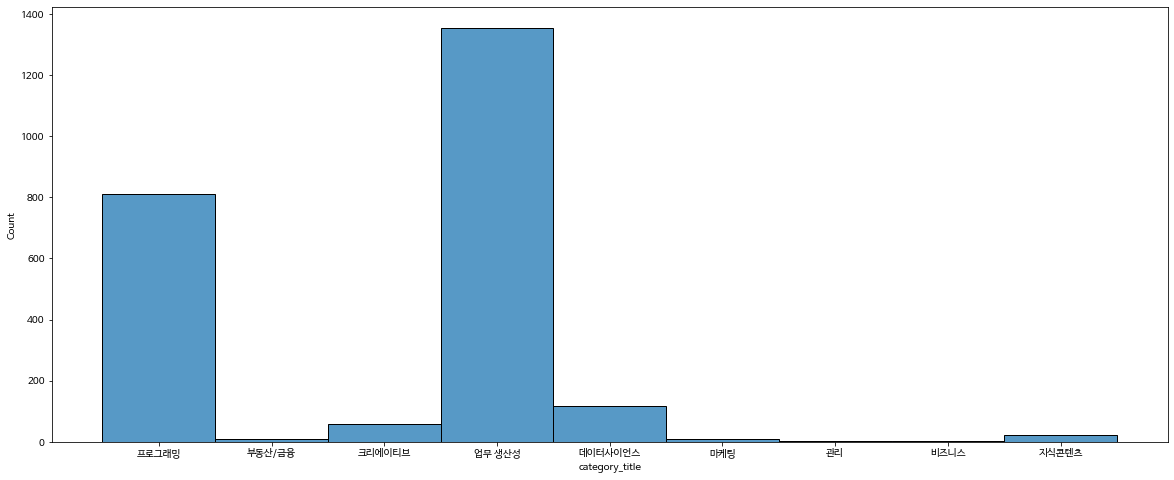

In [125]:
plt.figure(figsize=(20,8))
sns.histplot(data= data2,  x='category_title')
plt.xticks(rotation=0, fontsize=10)
plt.show()

In [119]:
data2['transaction_amount'].value_counts()

 19900      321
 19500      274
 20300      251
 24900      164
 30000      141
           ... 
-79000        1
 17550        1
 150000       1
-437500       1
 1350000      1
Name: transaction_amount, Length: 167, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


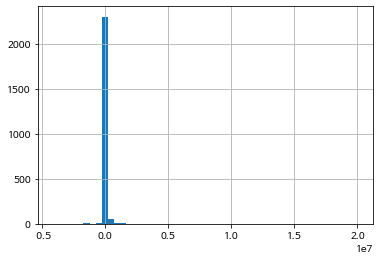

In [177]:
data2['transaction_amount'].hist(bins=50)

In [128]:
data2['transaction_amount'].min()

-4144074

In [157]:
data2[data2['transaction_amount']==data2['transaction_amount'].min()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2593,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,NaN,NaN,6700000.0,NaN,NaT,PG CARD


In [178]:
data2[data2['customer_id']==140373.0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2593,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,NaN,NaN,6700000.0,NaN,NaT,PG CARD


In [159]:
data[data['customer_id']==140373.0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
2593,985601,140373.0,203632.0,REFUND,COMPLETED,풀스택 개발 취업 완성 스쿨 14기,프로그래밍,스쿨,2021-04-01 16:55:34,-4144074,NaN,NaN,6700000.0,NaN,NaT,PG CARD
3002,988367,140373.0,201582.0,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-04-02 21:01:22,127500,NaN,NaN,127500.0,개발자 커리어,2019-09-30 00:00:00,PG CARD


In [131]:
data2['transaction_amount'].max()

20000000

In [133]:
data2[data2['transaction_amount']==data2['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
44149,1284700,572231.0,205574.0,PAYMENT,COMPLETED,(B2B) 임팩트캠퍼스 디지털 마케팅 프로젝트십,마케팅,B2G,2021-08-13 17:10:07,20000000,NaN,NaN,NaN,NaN,NaT,PG TRANSFER


In [179]:
how = {
    'id' : np.size,
    'transaction_amount' : np.sum,
}
data2.groupby(['category_title', 'type']).agg(how)

id  transaction_amount
category_title type                             
관리             PAYMENT     1              150000
데이터사이언스        PAYMENT   110            36429693
               REFUND      6            -4687000
마케팅            PAYMENT     8            20440000
부동산/금융         PAYMENT     7             2046000
               REFUND      1             -402500
비즈니스           PAYMENT     4               95865
업무 생산성         PAYMENT  1323            27255885
               REFUND     32             -625444
지식콘텐츠          PAYMENT    22             4970000
크리에이티브         PAYMENT    47             3227900
               REFUND     11            -3331033
프로그래밍          PAYMENT   678            57345960
               REFUND    133           -19538734

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


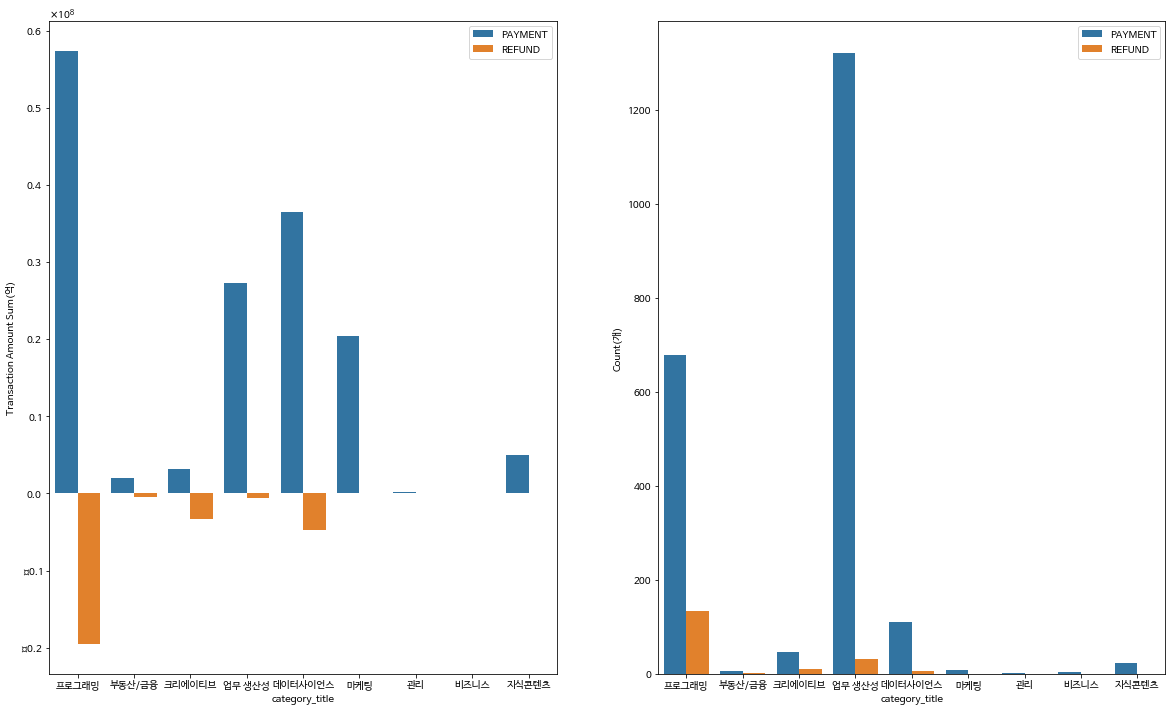

In [180]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=data2, y='transaction_amount', x='category_title', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
sns.barplot(data=data2, y='id', x='category_title', hue='type',  ci=None, estimator=np.size)
plt.legend(loc='upper right')
plt.ylabel('Count(개)')

plt.show()

In [183]:
cond = data['customer_id']==36541
data[cond]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
15047,1065300,36541.0,203531.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-05-11 19:06:44,187850,NaN,NaN,83500.0,데이터분석,2021-02-10 00:00:00,PG VOUCHER
15048,1065299,36541.0,203532.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+,데이터사이언스,올인원,2021-05-11 19:06:44,273000,NaN,NaN,93500.0,딥러닝/인공지능,2021-02-22 00:00:00,PG VOUCHER
15049,1065295,36541.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-05-11 19:06:44,207350,NaN,NaN,122000.0,PPT/보고서,2020-12-07 00:00:00,PG VOUCHER
29594,1172233,36541.0,202674.0,PAYMENT,COMPLETED,올인원 패키지 : 수학적으로 접근하는 딥러닝,데이터사이언스,올인원,2021-06-28 17:18:01,165050,NaN,NaN,158000.0,딥러닝/인공지능,2020-06-02 00:00:00,PG VOUCHER


In [184]:
cond = data['transaction_amount']>data['sale_price']
data[cond]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at,payment_data
4293,996550,461401.0,203848.0,PAYMENT,COMPLETED,부동산 디벨로퍼 아카데미 : 주거용 수익형 부동산 개발,부동산/금융,올인원,2021-04-07 14:49:55,143500,NaN,NaN,120000.0,부동산 개발,2020-12-24 00:00:00,PG TRANSFER
12741,1050531,382005.0,205059.0,PAYMENT,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 4기,데이터사이언스,온라인 완주반,2021-05-03 16:15:25,350000,NaN,NaN,330000.0,NaN,2021-04-26 00:00:00,PG TRANSFER
15047,1065300,36541.0,203531.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-05-11 19:06:44,187850,NaN,NaN,83500.0,데이터분석,2021-02-10 00:00:00,PG VOUCHER
15048,1065299,36541.0,203532.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+,데이터사이언스,올인원,2021-05-11 19:06:44,273000,NaN,NaN,93500.0,딥러닝/인공지능,2021-02-22 00:00:00,PG VOUCHER
15049,1065295,36541.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-05-11 19:06:44,207350,NaN,NaN,122000.0,PPT/보고서,2020-12-07 00:00:00,PG VOUCHER
29594,1172233,36541.0,202674.0,PAYMENT,COMPLETED,올인원 패키지 : 수학적으로 접근하는 딥러닝,데이터사이언스,올인원,2021-06-28 17:18:01,165050,NaN,NaN,158000.0,딥러닝/인공지능,2020-06-02 00:00:00,PG VOUCHER
33316,1206890,589068.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-07-09 15:32:05,193700,NaN,NaN,129000.0,데이터마케팅,2021-04-02 00:00:00,PG VOUCHER


## 데이터 전처리

##모델링

## 결과 보고서 작성